<a href="https://colab.research.google.com/github/Ar1720/Practise/blob/main/2023_2024_EDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from bokeh.plotting import figure, show


In [ ]:
# df.to_csv("name_goes_here.csv", encoding="utf-8")
# df.to_parquet("name_goes_here.snappy.parquet", compression="Snappy")

In [ ]:
# df = pd.read_csv('https://energysystems.bham.ac.uk/data-folder/espeni.csv')

df1 = pd.read_excel("https://www.ofgem.gov.uk/sites/default/files/2023-11/Feed-in%20Tariff%20Installation%20Report%20Part%201_1.xlsx", skiprows=4)
df2 = pd.read_excel("https://www.ofgem.gov.uk/sites/default/files/2023-11/Feed-in%20Tariff%20Installation%20Report%20Part%202.xlsx", skiprows=4)
df3 = pd.read_excel("https://www.ofgem.gov.uk/sites/default/files/2023-11/Feed-in%20Tariff%20Installation%20Report%20Part%203.xlsx", skiprows=4)

for df_name in ['df1', 'df2', 'df3']:
  eval(df_name).columns = [x.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "") for x in list(eval(df_name).columns)]
df = pd.concat(([df1, df2, df3], axis=0)
                                      .reset_index(drop=True)
                                      .set_index("commissioning_date")
                                      .sort_index())
# df = df.set_index("commissioning_date")
# df = df.sort_index()

In [ ]:
df["technology"].unique()

array(['Hydro', 'Wind', 'Photovoltaic', 'Anaerobic digestion',
       'Micro CHP'], dtype=object)

<Axes: xlabel='commissioning_date'>

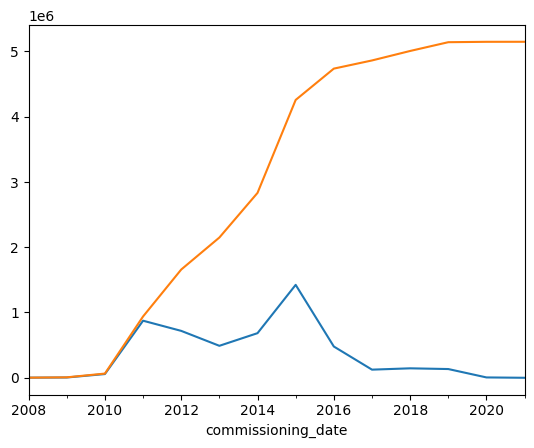

In [ ]:
df[df['technology']=="Photovoltaic"].loc["2008":"2023", "installed_capacity"].resample("Y").sum().plot()
df[df['technology']=="Photovoltaic"].loc["2008":"2023", "installed_capacity"].resample("Y").sum().cumsum().plot()

In [ ]:
x = df[df['technology']=="Photovoltaic"].loc["2008":"2023", "installed_capacity"].resample("W").sum().index
y = df[df['technology']=="Photovoltaic"].loc["2008":"2023", "installed_capacity"].resample("W").sum().values

import numpy as np
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

source = ColumnDataSource(data=dict(date=x, value=y))

p = figure(height=300, width=800, toolbar_location="above",
           x_axis_type="datetime", x_axis_location="above",
           background_fill_color="#efefef", x_range=(x[500], x[550]))

p.line('date', 'value', source=source)
p.yaxis.axis_label = 'MW'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130, width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None, background_fill_color="#efefef")

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

select.line('date', 'value', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_tool)
# select.toolbar.active_multi = range_tool

show(column(p, select))

In [ ]:
dfe.columns

Index(['ELEC_elex_startTime[utc](datetime)',
       'ELEC_startTime[localtime](datetime)', 'dayofyear[](int32)',
       'halfhourofyear[](int32)', 'ELEC_elexm_rowflag[](int8)',
       'ELEC_sdsp_calc[](string)', 'ELEC_bronze_settlementPeriod[](string)',
       'ELEC_POWER_ELEX_BIOMASS_PRECALC[MW](float32)',
       'ELEC_POWER_ELEX_CCGT[MW](float32)',
       'ELEC_POWER_ELEX_COAL[MW](float32)',
       'ELEC_POWER_ELEX_INTELEC[MW](float32)',
       'ELEC_POWER_ELEX_INTEW[MW](float32)',
       'ELEC_POWER_ELEX_INTFR[MW](float32)',
       'ELEC_POWER_ELEX_INTIFA2[MW](float32)',
       'ELEC_POWER_ELEX_INTIRL[MW](float32)',
       'ELEC_POWER_ELEX_INTNED[MW](float32)',
       'ELEC_POWER_ELEX_INTNEM[MW](float32)',
       'ELEC_POWER_ELEX_INTNSL[MW](float32)',
       'ELEC_POWER_ELEX_INTVKL[MW](float32)',
       'ELEC_POWER_ELEX_NPSHYD[MW](float32)',
       'ELEC_POWER_ELEX_NUCLEAR[MW](float32)',
       'ELEC_POWER_ELEX_OCGT[MW](float32)', 'ELEC_POWER_ELEX_OIL[MW](float32)',
       'ELEC_POW

In [ ]:
dfe = pd.read_csv('https://energysystems.bham.ac.uk/data-folder/espeni.csv')

<ipython-input-3-ee67d76fdd7a>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfe.loc[:, "ELEC_elex_startTime[utc](datetime)"] = pd.to_datetime(dfe.loc[:,"ELEC_elex_startTime[utc](datetime)"], utc=True)


<Axes: xlabel='ELEC_elex_startTime[utc](datetime)'>

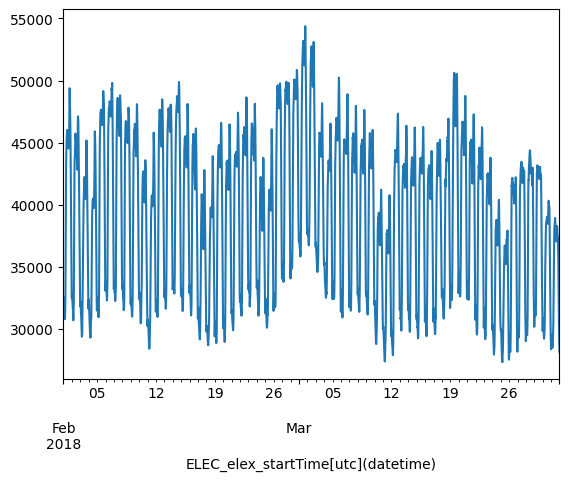

In [ ]:
dfe.loc[:, "ELEC_elex_startTime[utc](datetime)"] = pd.to_datetime(dfe.loc[:,"ELEC_elex_startTime[utc](datetime)"], utc=True)
dfe = dfe.set_index("ELEC_elex_startTime[utc](datetime)")
dfe = dfe.drop(columns=["ELEC_NGEM_startTime[utc](datetime)"])
dfe.loc["2018-02":"2018-03", "ELEC_POWER_TOTAL_ESPENI[MW](float32)"].plot()

In [ ]:
dfng = pd.read_csv('willenhall_wmids.csv')


In [ ]:
# dfng.info()
dfng["Timestamp"] = pd.to_datetime(dfng["Timestamp"], utc=True)
dfng = dfng.set_index(dfng["Timestamp"], drop=True)
dfng = dfng.sort_index()

In [ ]:
dfng.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2023-12-08 07:30:00+00:00 to 2023-12-08 13:25:00+00:00
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Timestamp   72 non-null     datetime64[ns, UTC]
 1   Net Demand  72 non-null     float64            
 2   Generation  72 non-null     float64            
 3   Import      72 non-null     float64            
 4   Solar       72 non-null     float64            
 5   Wind        72 non-null     float64            
 6   STOR        72 non-null     float64            
 7   Other       72 non-null     float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 5.1 KB


In [ ]:
x = dfng.index
y = dfng["Net Demand"]


import numpy as np
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

source = ColumnDataSource(data=dict(date=x, value=y))

p = figure(height=300, width=800, toolbar_location="above",
           x_axis_type="datetime", x_axis_location="above",
           background_fill_color="#efefef", x_range=(x[5], x[25]))

p.line('date', 'value', source=source)
p.yaxis.axis_label = 'MW'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130, width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None, background_fill_color="#efefef")

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

select.line('date', 'value', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_tool)
# select.toolbar.active_multi = range_tool

show(column(p, select))